In [1]:
from comut import comut
from comut import fileparsers
import palettable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from collections import OrderedDict
from datapreprocessfunction_code import function_process, readfile, rename_cols,annon,outers_join,label_paths

%config InlineBackend.figure_format = 'retina'

Linux-5.4.0-59-generic-x86_64-with-debian-buster-sid
Python 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
NumPy 1.19.5
SciPy 1.6.0
Scikit-Learn 0.24.1


Pathways based on positive correlation between GSEA C6 oncogeic gene signature and BRCA DE lncRNAs

In [134]:
%store -r data_new

In [130]:
data_new["pathway_y"]   = data_new.apply(lambda row: label_paths(row), axis=1)
data_new.drop('Pathway',axis=1,inplace=True)

In [135]:
num_cols                    = ['EZH2', 'H3K27','logFC','Meth_Mean','risk_alelle_freq','pathway_y','sphase_mean_FC','vaf','cnv_exp_cor',"Correlation"]
data_new[num_cols]          = data_new[num_cols].apply(pd.to_numeric, errors='coerce')

In [140]:
data_new.drop_duplicates()

,gene_sym,cancer_driver,drug_target,triplex,promoter_methylated,negative_correlated_methylation,positive_correlated_methylation,risk_alelle_freq,EZH2,H3K27,types,cnv_exp_cor,Meth_Mean,logFC,Correlation,target,sphase_mean_FC,vaf,pathway_y
0,AC062028.1,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,1.376536,0.000000,unknown,0.0,0.273400,0
1,LINC00467,No,No,No,No,No,No,0.0,0.0,0.0,t,0.5647,0.0,0.815080,0.463718,unknown,0.0,0.238314,1
2,C1orf147,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.705599,0.000000,unknown,0.0,0.000000,0
3,LINC01116,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.830010,0.471589,unknown,0.0,0.000000,1
6,LINC01116,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.830010,0.450748,unknown,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62192,LINC00891,Yes,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-1.251660,0.462915,unknown,0.0,0.000000,1
62193,LINC00891,Yes,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-1.251660,0.457868,unknown,0.0,0.000000,1
62195,LINC00891,Yes,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-1.251660,0.482828,unknown,0.0,0.000000,1
62196,LINC00891,Yes,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-1.251660,0.454535,unknown,0.0,0.000000,1


In [137]:
%store data_new

Stored 'data_new' (DataFrame)


In [14]:
down = data_new.query('logFC<=-0.58')

<AxesSubplot:ylabel='pathway_y'>

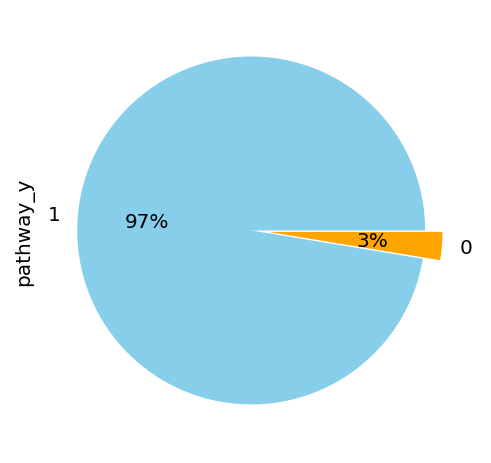

In [138]:
data_new.pathway_y.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'],
                                                      explode=(0.05, 0.05))

In [83]:
data = data_new
#data_new.drop(['gene_sym'],inplace =True,axis=1)


In [74]:
data_new.head()

,cancer_driver,drug_target,triplex,promoter_methylated,negative_correlated_methylation,positive_correlated_methylation,risk_alelle_freq,EZH2,H3K27,types,cnv_exp_cor,Meth_Mean,logFC,target,sphase_mean_FC,vaf,pathway_y
0,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,1.376536,unknown,0.0,0.273400,0
1,No,No,No,No,No,No,0.0,0.0,0.0,t,0.5647,0.0,0.815080,unknown,0.0,0.238314,1
2,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.705599,unknown,0.0,0.000000,0
3,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.830010,unknown,0.0,0.000000,1
4,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.990965,unknown,0.0,0.000000,1


In [84]:
cat_vars=['cancer_driver',
 'drug_target', 'promoter_methylated',
 'triplex','target','types']
for var in cat_vars:
    cat_list = 'var '+'_'+ var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1    = data.join(cat_list)
    data     = data1
    
cat_vars = ['cancer_driver',
 'drug_target', 'promoter_methylated',
 'triplex','target','types']
data_vars    = data.columns.values.tolist()
to_keep      = [i for i in data_vars if i not in cat_vars]

In [85]:
data_final =data[to_keep]
data_final =data_final.replace(['o','t','ot'],1)
#data_final.drop(['gene_sym'],axis=1,inplace=True)
data_final=data_final.replace(['unknown', 'Yes'], 
                     [0,1])
data_final=data_final.replace('yes', 
                     1)
data_final=data_final.replace('No', 
                     0)
data_final=data_final.fillna(0)

In [86]:
X  = data_final.loc[:, data_final.columns != 'pathway_y']
y  = data_final.loc[:, data_final.columns == 'pathway_y']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns   = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['pathway_y'])

In [87]:
# Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no pathways in oversampled data",len(os_data_y[os_data_y['pathway_y']==0]))
print("Number of pathways",len(os_data_y[os_data_y['pathway_y']==1]))
print("Proportion of no pathways data in oversampled data is ",len(os_data_y[os_data_y['pathway_y']==0])/len(os_data_X))
print("Proportion of pathways data in oversampled data is ",len(os_data_y[os_data_y['pathway_y']==1])/len(os_data_X))

length of oversampled data is  2254
Number of no pathways in oversampled data 1127
Number of pathways 1127
Proportion of no pathways data in oversampled data is  0.5
Proportion of pathways data in oversampled data is  0.5


In [88]:
data_final_vars=data_final.columns.values.tolist()
data_final.columns

Index(['negative_correlated_methylation', 'positive_correlated_methylation',
       'risk_alelle_freq', 'EZH2', 'H3K27', 'cnv_exp_cor', 'Meth_Mean',
       'logFC', 'sphase_mean_FC', 'vaf', 'pathway_y', 'cancer_driver_No',
       'cancer_driver_Yes', 'drug_target_No', 'promoter_methylated_No',
       'promoter_methylated_Yes', 'triplex_No', 'triplex_Yes', 'target_Yes',
       'target_unknown', 'types_o', 'types_ot', 'types_t', 'types_unknown'],
      dtype='object')

In [89]:
y=['pathway_y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/alva/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/alva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[ True  True  True  True  True  True False  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 2 1 1 1 1 3 4 1 1 1 1 1 1 1 1 1 1]


In [90]:
os_data_X.columns[rfe.support_].tolist()

['negative_correlated_methylation',
 'positive_correlated_methylation',
 'risk_alelle_freq',
 'EZH2',
 'H3K27',
 'cnv_exp_cor',
 'logFC',
 'sphase_mean_FC',
 'vaf',
 'cancer_driver_No',
 'promoter_methylated_No',
 'promoter_methylated_Yes',
 'triplex_No',
 'triplex_Yes',
 'target_Yes',
 'target_unknown',
 'types_o',
 'types_ot',
 'types_t',
 'types_unknown']

In [123]:
cols=[
 'positive_correlated_methylation',
 'EZH2',
 'H3K27',
 'cnv_exp_cor',
 'logFC',
 'sphase_mean_FC',
 'vaf',
 'cancer_driver_No',
 'promoter_methylated_No',
 'promoter_methylated_Yes',
 'target_Yes',
 'target_unknown',
 'types_o',
 'types_ot',
 'types_t',
 'types_unknown']
X=os_data_X[cols]
y=os_data_y['pathway_y']

In [124]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.672437
         Iterations: 35
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.030     
Dependent Variable:         pathway_y                AIC:                      3063.3444 
Date:                       2021-03-08 12:31         BIC:                      3154.8717 
No. Observations:           2254                     Log-Likelihood:           -1515.7   
Df Model:                   15                       LL-Null:                  -1562.4   
Df Residuals:               2238                     LLR p-value:              2.3293e-13
Converged:                  0.0000                   Scale:                    1.0000    
No. Iterations:             35.0000                                                      
-----------------------------------------------------------------------------------------
                                 Coef.    Std.Err.     z    P>|z|     [0

/home/alva/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=1.0,class_weight=None,dual=False, fit_intercept=True,intercept_scaling=1,
                   max_iter=100,multi_class='ovr',n_jobs=1, penalty='l2',random_state=None,solver='liblinear',tol=0.0001,
                  verbose=0,warm_start=False)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[187 136]
 [135 219]]


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       323
           1       0.62      0.62      0.62       354

    accuracy                           0.60       677
   macro avg       0.60      0.60      0.60       677
weighted avg       0.60      0.60      0.60       677



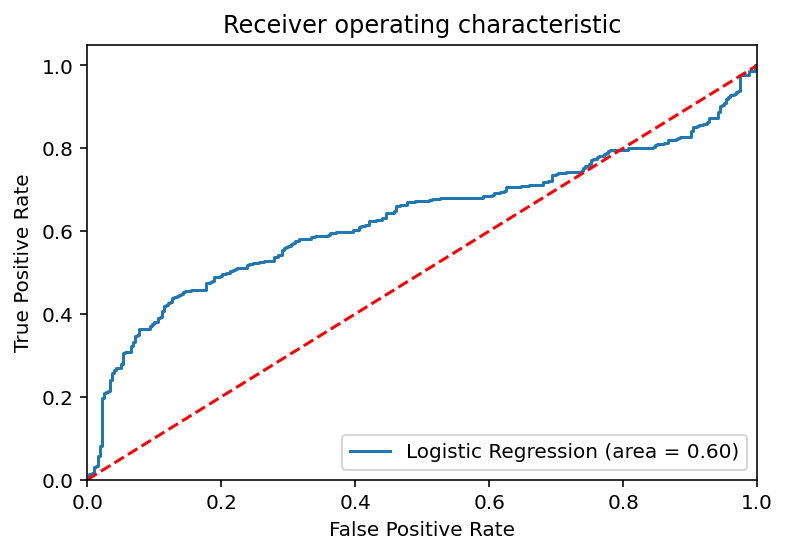

In [128]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC_BRCA_correlation_pathways.png')
plt.show()